# Project 2:  Ames Housing Data and Kaggle Challenge

# Problem Statement 

Given a dataset of houses and their features, we must find the best model to predict the sale price of these houses
and understand which features of the houses influence the sale price the most. The goal is helping property owners in order to maximize their house values.

# Step 1 : Data Import and Cleaning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
house_train_set = pd.read_csv('datasets/train.csv')

In [3]:
house_train_set

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      109  533352170           60        RL           NaN     13517   Pave   
1      544  531379050           60        RL          43.0     11492   Pave   
2      153  535304180           20        RL          68.0      7922   Pave   
3      318  916386060           60        RL          73.0      9802   Pave   
4      255  906425045           50        RL          82.0     14235   Pave   
...    ...        ...          ...       ...           ...       ...    ...   
2046  1587  921126030           20        RL          79.0     11449   Pave   
2047   785  905377130           30        RL           NaN     12342   Pave   
2048   916  909253010           50        RL          57.0      7558   Pave   
2049   639  535179160           20        RL          80.0     10400   Pave   
2050    10  527162130           60        RL          60.0      7500   Pave   

     Alley Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
0      NaN       IR1          Lvl  ...            0         0     NaN   NaN   
1      NaN       IR1          Lvl  ...            0         0     NaN   NaN   
2      NaN       Reg          Lvl  ...            0         0     NaN   NaN   
3      NaN       Reg          Lvl  ...            0         0     NaN   NaN   
4      NaN       IR1          Lvl  ...            0         0     NaN   NaN   
...    ...       ...          ...  ...          ...       ...     ...   ...   
2046   NaN       IR1          HLS  ...            0         0     NaN   NaN   
2047   NaN       IR1          Lvl  ...            0         0     NaN   NaN   
2048   NaN       Reg          Bnk  ...            0         0     NaN   NaN   
2049   NaN       Reg          Lvl  ...            0         0     NaN   NaN   
2050   NaN       Reg          Lvl  ...            0         0     NaN   NaN   

     Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
0             NaN        0       3    2010        WD      130500  
1             NaN        0       4    2009        WD      220000  
2             NaN        0       1    2010        WD      109000  
3             NaN        0       4    2010        WD      174000  
4             NaN        0       3    2010        WD      138500  
...           ...      ...     ...     ...        ...        ...  
2046          NaN        0       1    2008        WD      298751  
2047          NaN        0       3    2009        WD       82500  
2048          NaN        0       3    2009        WD      177000  
2049          NaN        0      11    2009        WD      144000  
2050          NaN        0       6    2010        WD      189000  

[2051 rows x 81 columns]

Let's rename the column in lowercase and using an underscore dash for separator

In [4]:
house_train_set.columns = house_train_set.columns.str.lower().str.replace(' ', '_')

We can check the shape of the dataframe; it's types and if it has any null values:

In [5]:
house_train_set.shape

(2051, 81)

In [6]:
pd.set_option("display.max_rows", 82 , "display.max_columns", 82)

In [7]:
house_train_set.dtypes

id                   int64
pid                  int64
ms_subclass          int64
ms_zoning           object
lot_frontage       float64
lot_area             int64
street              object
alley               object
lot_shape           object
land_contour        object
utilities           object
lot_config          object
land_slope          object
neighborhood        object
condition_1         object
condition_2         object
bldg_type           object
house_style         object
overall_qual         int64
overall_cond         int64
year_built           int64
year_remod/add       int64
roof_style          object
roof_matl           object
exterior_1st        object
exterior_2nd        object
mas_vnr_type        object
mas_vnr_area       float64
exter_qual          object
exter_cond          object
foundation          object
bsmt_qual           object
bsmt_cond           object
bsmt_exposure       object
bsmtfin_type_1      object
bsmtfin_sf_1       float64
bsmtfin_type_2      object
b

Let's look at the null values 

In [8]:
house_train_set.isnull().sum()

id                    0
pid                   0
ms_subclass           0
ms_zoning             0
lot_frontage        330
lot_area              0
street                0
alley              1911
lot_shape             0
land_contour          0
utilities             0
lot_config            0
land_slope            0
neighborhood          0
condition_1           0
condition_2           0
bldg_type             0
house_style           0
overall_qual          0
overall_cond          0
year_built            0
year_remod/add        0
roof_style            0
roof_matl             0
exterior_1st          0
exterior_2nd          0
mas_vnr_type         22
mas_vnr_area         22
exter_qual            0
exter_cond            0
foundation            0
bsmt_qual            55
bsmt_cond            55
bsmt_exposure        58
bsmtfin_type_1       55
bsmtfin_sf_1          1
bsmtfin_type_2       56
bsmtfin_sf_2          1
bsmt_unf_sf           1
total_bsmt_sf         1
heating               0
heating_qc      

We have a lot of null values. Let's take care of the null values and data type for each columns going from the one with most null values to the one with least null values

The first column we look at is the 'pool_qc' column which represent the quality of the pool in the houses. Let's look at it's unique values

In [9]:
house_train_set.pool_qc.unique()

array([nan, 'Fa', 'Gd', 'Ex', 'TA'], dtype=object)

The null values here represent the houses with no pool. Since it's a categorical feature and not numerical, we can fill the nulls with 'No pool':

In [10]:
house_train_set[['pool_qc']] = house_train_set[['pool_qc']].fillna(value= 'No Pool')

The next column with the most null value is the 'misc_feature' column. Based on the data dictionary, it correspond to extra miscellaneous features that are not in other columns like an elevator, second garage or even a tennis court.
The houses that have no extra features have a null in this column so I can replace the null with 'No extra features'

In [11]:
house_train_set[['misc_feature']] = house_train_set[['misc_feature']].fillna(value= 'No extra features')

I then look at the Alley column. It is the type of Alley access to the property. We can look at it's unique value:

In [12]:
house_train_set.alley.unique()

array([nan, 'Pave', 'Grvl'], dtype=object)

Some of the houses don't have an alley access and those houses are represented with the null values.
Since it is a categorical feature, I can replace the null with 'No alley'. Also no problems concerning the data type

In [13]:
house_train_set[['alley']] = house_train_set[['alley']].fillna(value= 'No alley')

The fence column represent the fence quality of the house, let's look at the values in the column:

In [14]:
house_train_set.fence.unique()

array([nan, 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

Once again, some houses have no fences thus the null values, let's fill those null values with 'No fence':

In [15]:
house_train_set[['fence']] = house_train_set[['fence']].fillna(value= 'No fence')

Based on the data dictionary, the fireplacequ column represent the fireplace quality of the houses. It is a categorical column. Let's look at it's unique values first:

In [16]:
house_train_set.fireplace_qu.unique()

array([nan, 'TA', 'Gd', 'Po', 'Ex', 'Fa'], dtype=object)

The null values here are the houses with no fireplace. Let's replace them with 'No fireplace'

In [17]:
house_train_set[['fireplace_qu']] = house_train_set[['fireplace_qu']].fillna(value= 'No Fireplace')

The next column is lot_frontage. It correspond to the linear feet of street connected to the property. Let's look at it's unique value first:

In [18]:
house_train_set.lot_frontage.unique()

array([ nan,  43.,  68.,  73.,  82., 137.,  35.,  70.,  21.,  64., 120.,
        24.,  74.,  93.,  34.,  80.,  71.,  72., 109.,  40., 103., 100.,
        92.,  65.,  75.,  60.,  30.,  79.,  41., 105., 107.,  81.,  36.,
        63.,  32.,  94.,  44.,  50.,  48.,  67.,  88.,  83.,  53.,  58.,
        57.,  52.,  87., 134.,  56.,  54., 140.,  78.,  85.,  90.,  96.,
        62.,  49.,  59., 155.,  91.,  61.,  86., 128.,  77.,  42.,  89.,
        51.,  69.,  55., 112.,  76., 125.,  98., 113., 102.,  22., 122.,
        84., 119., 118.,  66.,  95., 108., 195., 106.,  39., 110., 130.,
        97.,  45.,  37., 123.,  38., 129., 115.,  47., 114., 104.,  46.,
       121., 124., 313., 141., 101.,  99., 160., 174.,  26., 144., 138.,
       111.,  25.,  33., 200., 150., 117., 153., 116., 135.])

It is a numerical feature ! I assume that all houses are connected to a street. Let's calculate the mean of the non null value and compute it to the null value and change it's data type to float:

In [19]:
house_train_set['lot_frontage'].fillna(house_train_set['lot_frontage'].mean(), inplace=True)

In [20]:
house_train_set['lot_frontage'] = house_train_set['lot_frontage'].astype('float')

Let's look at the garage_type values

In [21]:
house_train_set.garage_type.unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'Basment', nan, '2Types', 'CarPort'],
      dtype=object)

It is a categorical feature. Based on data dictionnary; the null values are the houses with no garage. Let's replace the nan with 'no garage'

In [22]:
house_train_set[['garage_type']] = house_train_set[['garage_type']].fillna(value= 'No Garage')

Let's look at the garage_yr_blt values

In [23]:
house_train_set.garage_yr_blt.unique()

array([1976., 1997., 1953., 2007., 1957., 1966., 2005., 1959., 1952.,
       1969., 1971., 1900., 2000., 2004., 1916., 1963., 1977., 2009.,
       1968., 1992., 1955., 1961., 1973., 1937.,   nan, 2003., 1981.,
       1931., 1995., 1958., 1965., 2006., 1978., 1954., 1935., 1951.,
       1996., 1999., 1920., 1930., 1924., 1960., 1949., 1986., 1956.,
       1994., 1979., 1964., 2001., 1972., 1939., 1962., 1927., 1948.,
       1967., 1993., 2010., 1915., 1987., 1970., 1988., 1982., 1941.,
       1984., 1942., 1950., 2002., 1975., 2008., 1974., 1998., 1918.,
       1938., 1985., 1923., 1980., 1991., 1946., 1940., 1990., 1896.,
       1983., 1914., 1945., 1921., 1925., 1926., 1936., 1932., 1947.,
       1929., 1910., 1917., 1922., 1934., 1989., 1928., 2207., 1933.,
       1895., 1919.])

It is a numerical feature ! There are some null values but also outliers; houses built in 1896 or 1900 are possible but it would be useful to count those values. Also there is a 2207 value ? is it a typo ? otherwise it would be impossible. Let's count those values first.

In [24]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [25]:
house_train_set['garage_yr_blt'].value_counts(ascending=True)

1918.0      1
1895.0      1
1896.0      1
1919.0      1
1917.0      1
1933.0      1
2207.0      1
1932.0      2
1934.0      2
1929.0      2
2010.0      2
1914.0      2
1947.0      3
1900.0      3
1931.0      3
1924.0      4
1915.0      4
1937.0      4
1927.0      4
1921.0      4
1923.0      5
1916.0      5
1910.0      5
1946.0      5
1928.0      6
1942.0      6
1982.0      6
1938.0      6
1925.0      6
1922.0      6
1936.0      7
1983.0      7
1935.0      7
1926.0      8
1945.0     10
1986.0     10
1949.0     10
1991.0     10
1941.0     10
1952.0     10
1984.0     11
1981.0     11
1951.0     12
1985.0     12
1989.0     12
1948.0     14
1988.0     14
1955.0     15
1987.0     16
1939.0     16
2009.0     17
1972.0     17
1969.0     18
1971.0     18
1974.0     19
1953.0     19
1961.0     20
1940.0     20
1957.0     20
1973.0     20
1930.0     20
1970.0     20
1960.0     21
1920.0     21
1990.0     21
1963.0     22
1980.0     22
1992.0     22
1959.0     23
1954.0     25
1979.0     25
1975.0

Considering there are only few instances of those really old houses, I think it's best to keep them. Let's look at the row where the garage_yr_blt is equal to 2207

In [26]:
house_train_set[house_train_set['garage_yr_blt'] == 2207]

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
1699  2261  916384070           20        RL          68.0      8298   Pave   

         alley lot_shape land_contour utilities lot_config land_slope  \
1699  No alley       IR1          HLS    AllPub     Inside        Gtl   

     neighborhood condition_1 condition_2 bldg_type house_style  overall_qual  \
1699       Timber        Norm        Norm      1Fam      1Story             8   

      overall_cond  year_built  year_remod/add roof_style roof_matl  \
1699             5        2006            2007        Hip   CompShg   

     exterior_1st exterior_2nd mas_vnr_type  mas_vnr_area exter_qual  \
1699      VinylSd      VinylSd          NaN           NaN         Gd   

     exter_cond foundation bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1  \
1699         TA      PConc        Gd        TA            Av            GLQ   

      bsmtfin_sf_1 bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf  \
1699         583.0            Unf           0.0        963.0         1546.0   

     heating heating_qc central_air electrical  1st_flr_sf  2nd_flr_sf  \
1699    GasA         Ex           Y      SBrkr        1564           0   

      low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  \
1699                0         1564             0.0             0.0          2   

      half_bath  bedroom_abvgr  kitchen_abvgr kitchen_qual  totrms_abvgrd  \
1699          0              2              1           Ex              6   

     functional  fireplaces fireplace_qu garage_type  garage_yr_blt  \
1699        Typ           1           Gd      Attchd         2207.0   

     garage_finish  garage_cars  garage_area garage_qual garage_cond  \
1699           RFn          2.0        502.0          TA          TA   

     paved_drive  wood_deck_sf  open_porch_sf  enclosed_porch  3ssn_porch  \
1699           Y           132              0               0           0   

      screen_porch  pool_area  pool_qc     fence       misc_feature  misc_val  \
1699             0          0  No Pool  No fence  No extra features         0   

      mo_sold  yr_sold sale_type  saleprice  
1699        9     2007       New     267300

We can see that the year_remod/add is 2007. This is probably when the garage was remodeled. Let's change this value to 2007 as it was probably a typo.

In [27]:
house_train_set['garage_yr_blt'] = house_train_set['garage_yr_blt'].replace([2207],2007)

Let's also fill the null values with 'No garage'

In [28]:
house_train_set[['garage_yr_blt']] = house_train_set[['garage_yr_blt']].fillna(value= 'No garage')

actually let's convert those to 0 to change the column type to float

In [29]:
house_train_set['garage_yr_blt'] = house_train_set['garage_yr_blt'].replace(['No garage'],0)

now let's convert this column to float: 

In [30]:
house_train_set['garage_yr_blt'] = house_train_set['garage_yr_blt'].astype('float')

Let's look at the garage_finish values:

In [31]:
house_train_set.garage_finish.unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

 we can replace the null values to 'No garage' based on the info provided in the data dictionary: 

In [32]:
house_train_set[['garage_finish']] = house_train_set[['garage_finish']].fillna(value= 'No Garage')

Let's look at the garage_qual values :

In [33]:
house_train_set[['garage_qual']] = house_train_set[['garage_qual']].fillna(value= 'No Garage')

There is also a garage_cond column which indicate the garage condition based on the data dictionary. I think it's redundant; it has the same null values that the garage_qual had and indicates the same thing. I decide to drop this column as it doesn't bring new information on the houses.

In [34]:
house_train_set.drop('garage_cond', axis=1, inplace=True)

Let's look at the bsmt_exposure values :

In [35]:
house_train_set.bsmt_exposure.unique()

array(['No', 'Gd', 'Av', nan, 'Mn'], dtype=object)

The No values represent houses that have a basement with no exposure. Here the null values represent houses with no basement. Let's replace the null values with 'No basement'. Let's also change the 'No' values to 'No exposure' for clarity

In [36]:
house_train_set['bsmt_exposure'] = house_train_set['bsmt_exposure'].replace(['No'],'No exposure')

In [37]:
house_train_set[['bsmt_exposure']] = house_train_set[['bsmt_exposure']].fillna(value= 'No basement')

the bsmtfin_type_2 column represent the quality of the basement second finished area (if present). It has 56 null values which are the houses with no basement. Let's fill the null values with 'No basement':

In [38]:
house_train_set[['bsmtfin_type_2']] = house_train_set[['bsmtfin_type_2']].fillna(value= 'No basement')

Let's look at bsmtfin_type_1 values :

In [39]:
house_train_set.bsmtfin_type_1.unique()

array(['GLQ', 'Unf', 'ALQ', 'Rec', nan, 'BLQ', 'LwQ'], dtype=object)

The null values are the houses with no basement; let's fill them with 'No basement':

In [40]:
house_train_set[['bsmtfin_type_1']] = house_train_set[['bsmtfin_type_1']].fillna(value= 'No basement')

Let's look at bsmt_qual values :

In [41]:
house_train_set.bsmt_qual.unique()

array(['TA', 'Gd', 'Fa', nan, 'Ex', 'Po'], dtype=object)

The null values in the bsmt_qual column represent the houses with no basement; let's fill them with 'No basement':

In [42]:
house_train_set[['bsmt_qual']] = house_train_set[['bsmt_qual']].fillna(value= 'No basement')

the bsmt_qual represent the height of a basement so let's rename it to bsmt_height

In [43]:
house_train_set.rename(columns={'bsmt_qual':'bsmt_height'}, inplace=True)

The bsmt_cond also have null values; let's observe it's unique values first:

In [44]:
house_train_set.bsmt_cond.unique()

array(['TA', 'Gd', nan, 'Fa', 'Po', 'Ex'], dtype=object)

The null values in this column are the houses with no basement again. Let's fill those null with 'No basement'

In [45]:
house_train_set[['bsmt_cond']] = house_train_set[['bsmt_cond']].fillna(value= 'No basement')

Let's look at the mas_vnr_type column values which contains 22 null:

In [46]:
house_train_set.mas_vnr_type.unique()

array(['BrkFace', 'None', nan, 'Stone', 'BrkCmn'], dtype=object)

I assume that the null values represent houses with no masonry veneer. There is already a value 'None' for these houses so I will fill the null values with 'None'

In [47]:
house_train_set[['mas_vnr_type']] = house_train_set[['mas_vnr_type']].fillna(value= 'None')

The mas_vnr_area column contains 22 null values. Let's look at it's unique values:

In [48]:
house_train_set.mas_vnr_area.unique()

array([2.890e+02, 1.320e+02, 0.000e+00, 8.200e+01, 1.800e+02, 1.920e+02,
       2.320e+02, 4.560e+02, 1.480e+02,       nan, 3.000e+00, 3.360e+02,
       4.800e+02, 3.200e+02, 1.040e+02, 3.350e+02, 4.000e+01, 1.100e+02,
       1.060e+02, 5.130e+02, 1.840e+02, 5.220e+02, 1.430e+02, 3.480e+02,
       1.170e+02, 5.100e+02, 1.450e+02, 9.600e+01, 6.680e+02, 5.000e+01,
       2.280e+02, 6.500e+01, 3.610e+02, 7.480e+02, 1.970e+02, 5.720e+02,
       1.280e+02, 1.200e+02, 2.540e+02, 8.600e+01, 3.000e+01, 5.400e+01,
       2.460e+02, 3.970e+02, 2.960e+02, 1.440e+02, 9.020e+02, 2.610e+02,
       2.600e+02, 2.750e+02, 5.700e+01, 1.050e+03, 3.590e+02, 1.080e+02,
       6.620e+02, 5.000e+02, 2.100e+02, 1.650e+02, 2.080e+02, 3.600e+02,
       1.600e+02, 6.400e+01, 2.240e+02, 2.060e+02, 1.160e+02, 6.510e+02,
       5.040e+02, 2.520e+02, 3.370e+02, 8.400e+01, 3.090e+02, 4.660e+02,
       6.000e+02, 1.890e+02, 3.680e+02, 1.980e+02, 1.400e+02, 9.220e+02,
       1.600e+01, 1.800e+01, 9.000e+01, 4.250e+02, 

First of all, since it's a numerical column, the 'No exposure' value should be replaced to 0. Also there were 22 null values in the mas_vnr_type and I concluded that there were houses with no masonry veneer. The 22 null in this column represent those houses and can be filled with 0:

In [49]:
house_train_set[['mas_vnr_area']] = house_train_set[['mas_vnr_area']].fillna(value=0)

Let's change the mas_vnr_area to a float type:

In [50]:
house_train_set['mas_vnr_area'] = house_train_set['mas_vnr_area'].astype('float') 

Alright; I took care of all the columns containing a substansial number of null values; let's observe what we have left: 

In [51]:
house_train_set.isnull().sum()

id                 0
pid                0
ms_subclass        0
ms_zoning          0
lot_frontage       0
lot_area           0
street             0
alley              0
lot_shape          0
land_contour       0
utilities          0
lot_config         0
land_slope         0
neighborhood       0
condition_1        0
condition_2        0
bldg_type          0
house_style        0
overall_qual       0
overall_cond       0
year_built         0
year_remod/add     0
roof_style         0
roof_matl          0
exterior_1st       0
exterior_2nd       0
mas_vnr_type       0
mas_vnr_area       0
exter_qual         0
exter_cond         0
foundation         0
bsmt_height        0
bsmt_cond          0
bsmt_exposure      0
bsmtfin_type_1     0
bsmtfin_sf_1       1
bsmtfin_type_2     0
bsmtfin_sf_2       1
bsmt_unf_sf        1
total_bsmt_sf      1
heating            0
heating_qc         0
central_air        0
electrical         0
1st_flr_sf         0
2nd_flr_sf         0
low_qual_fin_sf    0
gr_liv_area  

Since we only have singular instances of null values in few columns, I feel confident droping the remaining nulls without losing the integrity of the data

In [52]:
house_train_set.dropna(inplace=True)

Let's make sure all the data types are correct before we can make any calculations. To do that I will use the head method and look to see if there are number and confirm it with the dtype serie:

In [53]:
house_train_set.head(2)

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
0  109  533352170           60        RL       69.0552     13517   Pave   
1  544  531379050           60        RL       43.0000     11492   Pave   

      alley lot_shape land_contour utilities lot_config land_slope  \
0  No alley       IR1          Lvl    AllPub    CulDSac        Gtl   
1  No alley       IR1          Lvl    AllPub    CulDSac        Gtl   

  neighborhood condition_1 condition_2 bldg_type house_style  overall_qual  \
0       Sawyer        RRAe        Norm      1Fam      2Story             6   
1      SawyerW        Norm        Norm      1Fam      2Story             7   

   overall_cond  year_built  year_remod/add roof_style roof_matl exterior_1st  \
0             8        1976            2005      Gable   CompShg      HdBoard   
1             5        1996            1997      Gable   CompShg      VinylSd   

  exterior_2nd mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation  \
0      Plywood      BrkFace         289.0         Gd         TA     CBlock   
1      VinylSd      BrkFace         132.0         Gd         TA      PConc   

  bsmt_height bsmt_cond bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1  \
0          TA        TA   No exposure            GLQ         533.0   
1          Gd        TA   No exposure            GLQ         637.0   

  bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating heating_qc  \
0            Unf           0.0        192.0          725.0    GasA         Ex   
1            Unf           0.0        276.0          913.0    GasA         Ex   

  central_air electrical  1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  \
0           Y      SBrkr         725         754                0   
1           Y      SBrkr         913        1209                0   

   gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  half_bath  \
0         1479             0.0             0.0          2          1   
1         2122             1.0             0.0          2          1   

   bedroom_abvgr  kitchen_abvgr kitchen_qual  totrms_abvgrd functional  \
0              3              1           Gd              6        Typ   
1              4              1           Gd              8        Typ   

   fireplaces  fireplace_qu garage_type  garage_yr_blt garage_finish  \
0           0  No Fireplace      Attchd         1976.0           RFn   
1           1            TA      Attchd         1997.0           RFn   

   garage_cars  garage_area garage_qual paved_drive  wood_deck_sf  \
0          2.0        475.0          TA           Y             0   
1          2.0        559.0          TA           Y             0   

   open_porch_sf  enclosed_porch  3ssn_porch  screen_porch  pool_area  \
0             44               0           0             0          0   
1             74               0           0             0          0   

   pool_qc     fence       misc_feature  misc_val  mo_sold  yr_sold sale_type  \
0  No Pool  No fence  No extra features         0        3     2010       WD    
1  No Pool  No fence  No extra features         0        4     2009       WD    

   saleprice  
0     130500  
1     220000

In [54]:
house_train_set.dtypes

id                   int64
pid                  int64
ms_subclass          int64
ms_zoning           object
lot_frontage       float64
lot_area             int64
street              object
alley               object
lot_shape           object
land_contour        object
utilities           object
lot_config          object
land_slope          object
neighborhood        object
condition_1         object
condition_2         object
bldg_type           object
house_style         object
overall_qual         int64
overall_cond         int64
year_built           int64
year_remod/add       int64
roof_style          object
roof_matl           object
exterior_1st        object
exterior_2nd        object
mas_vnr_type        object
mas_vnr_area       float64
exter_qual          object
exter_cond          object
foundation          object
bsmt_height         object
bsmt_cond           object
bsmt_exposure       object
bsmtfin_type_1      object
bsmtfin_sf_1       float64
bsmtfin_type_2      object
b

All the data types are correct; let's save this dataframe to a csv file calling it 'house_train_set'

In [55]:
house_train_set.to_csv('datasets/house_train_set.csv')

Let's import the test data set :

In [56]:
house_test_data = pd.read_csv('datasets/test.csv')

In [57]:
house_test_data.head(5)

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   

  Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0  Grvl       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
1   NaN       IR1          Lvl    AllPub     Inside        Gtl       Sawyer   
2   NaN       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
3   NaN       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
4   NaN       IR1          Lvl    AllPub     Inside        Gtl        NAmes   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        Norm        Norm    2fmCon      2Story             6             8   
1        Norm        Norm    Duplex      1Story             5             4   
2        Norm        Norm      1Fam      2Story             7             5   
3        Norm        Norm      1Fam      1Story             5             6   
4        Norm        Norm      1Fam      1Story             6             5   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1910            1950      Gable   CompShg      AsbShng      AsbShng   
1        1977            1977      Gable   CompShg      Plywood      Plywood   
2        2006            2006      Gable   CompShg      VinylSd      VinylSd   
3        1923            2006      Gable   CompShg      Wd Sdng      Wd Sdng   
4        1963            1963      Gable   CompShg      Plywood      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0         None           0.0         TA         Fa      Stone        Fa   
1         None           0.0         TA         TA     CBlock        Gd   
2         None           0.0         Gd         TA      PConc        Gd   
3         None           0.0         Gd         TA     CBlock        TA   
4      BrkFace         247.0         TA         TA     CBlock        Gd   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            Unf             0            Unf   
1        TA            No            Unf             0            Unf   
2        Gd            Av            GLQ           554            Unf   
3        TA            No            Unf             0            Unf   
4        TA            No            BLQ           609            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0             0         1020           1020    GasA         Gd           N   
1             0         1967           1967    GasA         TA           Y   
2             0          100            654    GasA         Ex           Y   
3             0          968            968    GasA         TA           Y   
4             0          785           1394    GasA         Gd           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      FuseP         908        1020                0         1928   
1      SBrkr        1967           0                0         1967   
2      SBrkr         664         832                0         1496   
3      SBrkr         968           0                0          968   
4      SBrkr        1394           0                0         1394   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0               0               0          2          0              4   
1               0               0          2          0              6   
2               1               0          2          1              3   
3               0               0        

The house test data has the same number of features minus the sale price which we are trying to predict. Let's  rename the column as we did on the house_train_set and check the null values:

In [58]:
house_test_data.columns = house_test_data.columns.str.lower().str.replace(' ', '_')

In [59]:
pd.set_option("display.max_rows", 82 , "display.max_columns", 82)

In [60]:
house_test_data.isnull().sum()

id                   0
pid                  0
ms_subclass          0
ms_zoning            0
lot_frontage       160
lot_area             0
street               0
alley              820
lot_shape            0
land_contour         0
utilities            0
lot_config           0
land_slope           0
neighborhood         0
condition_1          0
condition_2          0
bldg_type            0
house_style          0
overall_qual         0
overall_cond         0
year_built           0
year_remod/add       0
roof_style           0
roof_matl            0
exterior_1st         0
exterior_2nd         0
mas_vnr_type         1
mas_vnr_area         1
exter_qual           0
exter_cond           0
foundation           0
bsmt_qual           25
bsmt_cond           25
bsmt_exposure       25
bsmtfin_type_1      25
bsmtfin_sf_1         0
bsmtfin_type_2      25
bsmtfin_sf_2         0
bsmt_unf_sf          0
total_bsmt_sf        0
heating              0
heating_qc           0
central_air          0
electrical 

The null values are present in the same columns the the one that were in the house_train_set. Let's apply the same methods on the house_test_data:

In [61]:
house_test_data[['pool_qc']] = house_test_data[['pool_qc']].fillna(value= 'No Pool')
house_test_data[['misc_feature']] = house_test_data[['misc_feature']].fillna(value= 'No extra features')
house_test_data[['alley']] = house_test_data[['alley']].fillna(value= 'No alley')
house_test_data[['fence']] = house_test_data[['fence']].fillna(value= 'No fence')
house_test_data[['fireplace_qu']] = house_test_data[['fireplace_qu']].fillna(value= 'No Fireplace')
house_test_data['lot_frontage'].fillna(house_test_data['lot_frontage'].mean(), inplace=True)
house_test_data['lot_frontage'] = house_test_data['lot_frontage'].astype('float')
house_test_data[['garage_type']] = house_test_data[['garage_type']].fillna(value= 'No Garage')
house_test_data[['garage_yr_blt']] = house_test_data[['garage_yr_blt']].fillna(value= 0)
house_test_data['garage_yr_blt'] = house_test_data['garage_yr_blt'].astype('float')
house_test_data[['garage_finish']] = house_test_data[['garage_finish']].fillna(value= 'No Garage')
house_test_data[['garage_qual']] = house_test_data[['garage_qual']].fillna(value= 'No Garage')
house_test_data.drop('garage_cond', axis=1, inplace=True)
house_test_data['bsmt_exposure'] = house_test_data['bsmt_exposure'].replace(['No'],'No exposure')
house_test_data[['bsmt_exposure']] = house_test_data[['bsmt_exposure']].fillna(value= 'No basement')
house_test_data.rename(columns={'bsmt_qual':'bsmt_height'}, inplace=True)
house_test_data[['bsmt_height']] = house_test_data[['bsmt_height']].fillna(value= 'No basement')
house_test_data[['bsmt_cond']] = house_test_data[['bsmt_cond']].fillna(value= 'No basement')
house_test_data[['mas_vnr_type']] = house_test_data[['mas_vnr_type']].fillna(value= 'None')
house_test_data[['mas_vnr_area']] = house_test_data[['mas_vnr_area']].fillna(value=0)
house_test_data['mas_vnr_area'] = house_test_data['mas_vnr_area'].astype('float')
house_test_data[['bsmtfin_type_2']] = house_test_data[['bsmtfin_type_2']].fillna(value= 'No basement')
house_test_data[['bsmtfin_type_1']] = house_test_data[['bsmtfin_type_1']].fillna(value= 'No basement')


Done! Let's see how many nulls are left:

In [62]:
house_test_data.isnull().sum()

id                 0
pid                0
ms_subclass        0
ms_zoning          0
lot_frontage       0
lot_area           0
street             0
alley              0
lot_shape          0
land_contour       0
utilities          0
lot_config         0
land_slope         0
neighborhood       0
condition_1        0
condition_2        0
bldg_type          0
house_style        0
overall_qual       0
overall_cond       0
year_built         0
year_remod/add     0
roof_style         0
roof_matl          0
exterior_1st       0
exterior_2nd       0
mas_vnr_type       0
mas_vnr_area       0
exter_qual         0
exter_cond         0
foundation         0
bsmt_height        0
bsmt_cond          0
bsmt_exposure      0
bsmtfin_type_1     0
bsmtfin_sf_1       0
bsmtfin_type_2     0
bsmtfin_sf_2       0
bsmt_unf_sf        0
total_bsmt_sf      0
heating            0
heating_qc         0
central_air        0
electrical         1
1st_flr_sf         0
2nd_flr_sf         0
low_qual_fin_sf    0
gr_liv_area  

Only one null left on the electrical column. Since I can't drop any rows on the house_test_data; I will fill this null with 'No data'

In [63]:
house_test_data[['electrical']] = house_test_data[['electrical']].fillna(value= 'No data')

We can now save the house_test_data to a csv file. I will use this file to test the models I will build and for the kaggle submissions.

In [65]:
house_test_data.to_csv('datasets/house_test_data.csv')

# Step 2 : Exploratory Analysis

We are trying to predict the price of the houses so it is useful to observe the distribution of price in the dataset : 

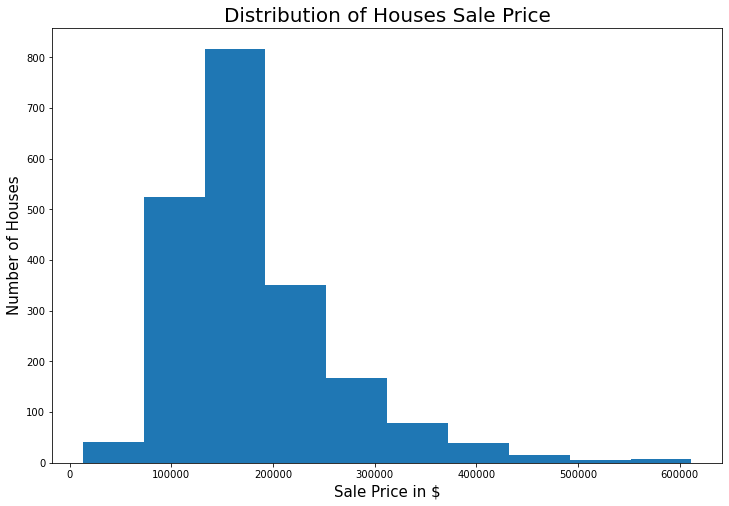

In [70]:
plt.figure(figsize=(12, 8))
plt.hist(house_train_set['saleprice'])
plt.title('Distribution of Houses Sale Price', fontsize=20)
plt.xlabel('Sale Price in $', fontsize=15)
plt.ylabel('Number of Houses', fontsize=15);

As seen above; the distribution of house prices is right-skewed. The prices are not normally distributed since they are centered around the mean. We have very few houses below 100,000 dollars and most houses are between 100,000 dollars and 200,000 dollars. Understandably, the higher prices have fewer houses but are present.

Let's observe the maximum and minimum values as well as other statistics:

In [73]:
house_train_set['saleprice'].describe().T

count      2048.000000
mean     181484.252441
std       79248.657891
min       12789.000000
25%      129837.500000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64

The average price of a house in this dataset is 181,484 dollars and I am confident to say that 95% of the houses are between 22,986 and 339,981 dollars based on the standard deviation. The minimum value for sale price is 12,789 dollars and the most expensive house is at 611,657 dollars.

Now that we have a better understanding of the house prices in this dataset; let's explore some relationship between the features and the price. Let's focus on the numerical columns first and visualize a heatmap to understand their correlation with the sale price:

In [80]:
numerical_features = house_train_set[['pid', 'ms_subclass', 'lot_frontage', 'lot_area','overall_qual', 'overall_cond', 'year_built',\
                        'year_remod/add', 'mas_vnr_area', 'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',\
                          '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath', 'full_bath',\
                          'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces', 'garage_yr_blt',\
                          'garage_cars', 'garage_area', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch',\
                          'screen_porch', 'pool_area', 'misc_val', 'mo_sold', 'yr_sold', 'saleprice']]

<AxesSubplot:>

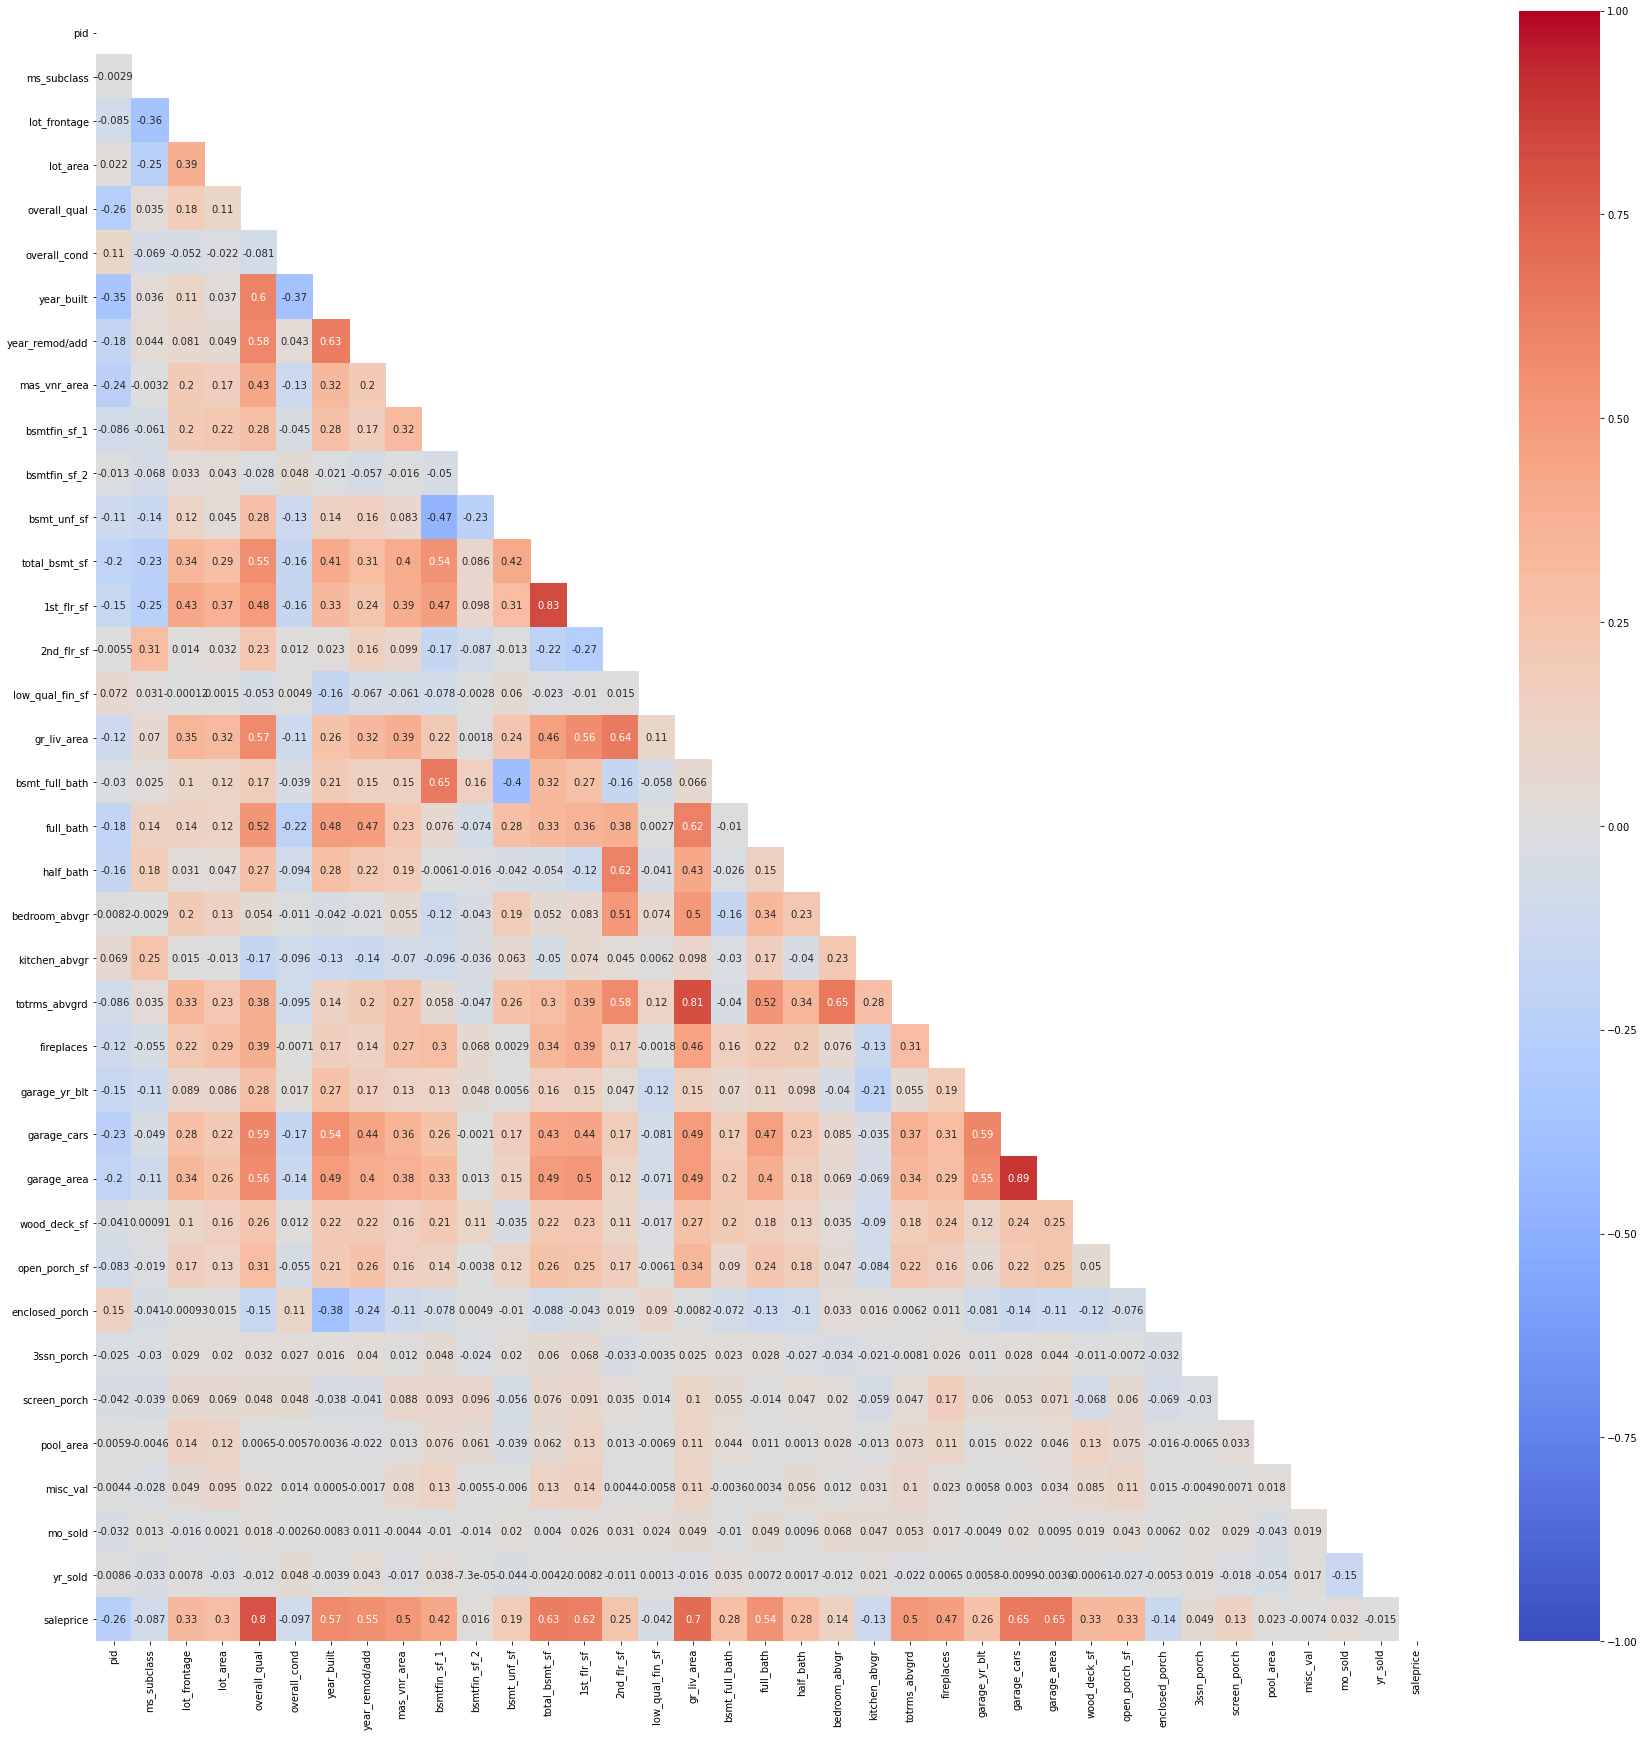

In [81]:
corr = numerical_features.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(30, 30))
sns.heatmap(corr, annot=True,
cmap='coolwarm', vmin=-1, vmax=1, mask=mask)

If we look at the numerical features only and based on the heatmap above; the 5 columns with the highest correlation to sale price are overall_qual, gr_liv_area, garage_area and garage_cars, total_bsmt_sf and 1st_flr_sf.
These findings make a lot of sense especially regarding the overall quality of the houses, the square footage of the above ground living area, basement and first floor as well as the garage.
Let's closely look at those relationship on a 1 by 1 basis with a few scatterplots:

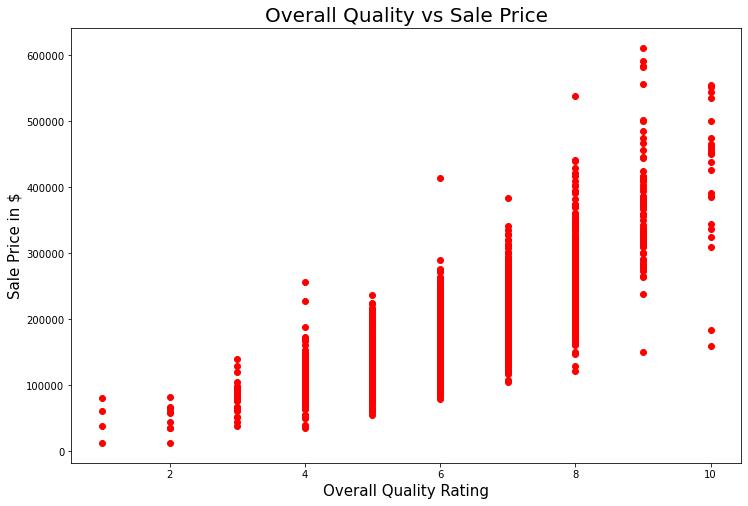

In [87]:
plt.figure(figsize=(12, 8))
plt.scatter(house_train_set['overall_qual'], house_train_set['saleprice'], color = "red")
plt.title('Overall Quality vs Sale Price', fontsize=20)
plt.ylabel('Sale Price in $', fontsize = 15)
plt.xlabel('Overall Quality Rating', fontsize = 15);



We clearly can observe the relationship between overall quality and sale price as the price increase when the overall quality is higher. This feature is definitely influential on the final price of a house.

Now let's observe the relationship between gr_liv_area which is the square footage of the above ground living area and the sale price with a scatter plot:

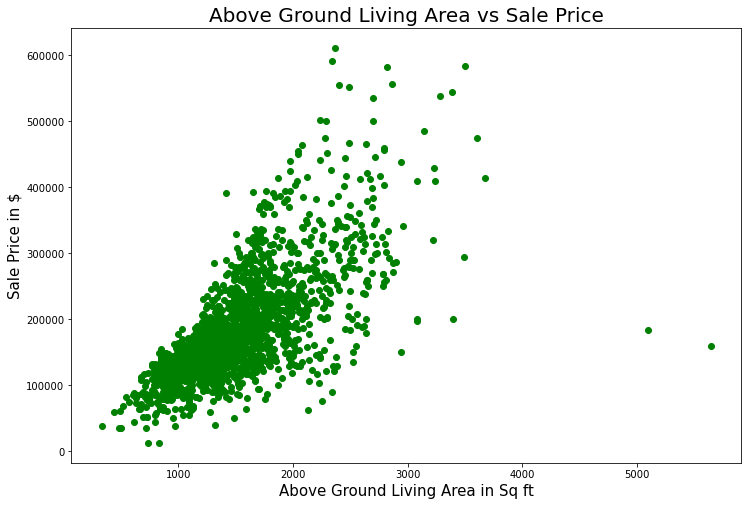

In [89]:
plt.figure(figsize=(12, 8))
plt.scatter(house_train_set['gr_liv_area'], house_train_set['saleprice'], color = "green")
plt.title('Above Ground Living Area vs Sale Price', fontsize=20)
plt.ylabel('Sale Price in $', fontsize = 15)
plt.xlabel('Above Ground Living Area in Sq ft', fontsize = 15);


As we can see above, there is a visible trend. When the above ground living area increase in space; there is an increase in price. We can also observe some outliers notably two above 5000 sqft. Most houses between 100,000 and 200,000 dollars as noted earlier are between 1000 and 2000 sq ft(above ground living area)

Let's look at the relationship between garage area and sale price:

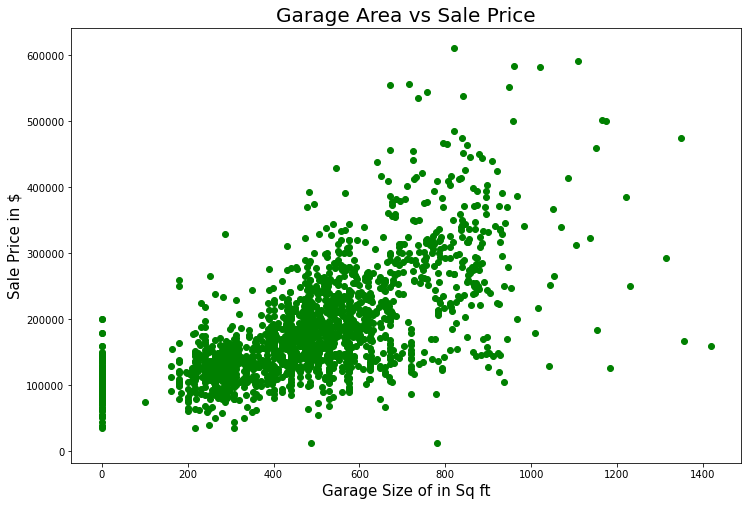

In [92]:
plt.figure(figsize=(12, 8))
plt.scatter(house_train_set['garage_area'], house_train_set['saleprice'], color = "green")
plt.title('Garage Area vs Sale Price', fontsize=20)
plt.ylabel('Sale Price in $', fontsize = 15)
plt.xlabel('Garage Size of in Sq ft', fontsize = 15);


Generally, as the size of the garage increase, the price of the houses increase as well. In this case we can observe a number of houses with no garage as well as outliers with a garage size above 1200 square feet. The most expensive houses don't have the biggest garage in the set. While it is an important factor in the final price of the house, it has to be noted that up to a certain point it is positively affecting the price of a house and then after that it doesn't add much.

Let's look at the relationship between the total basement sq ft and the sale price:

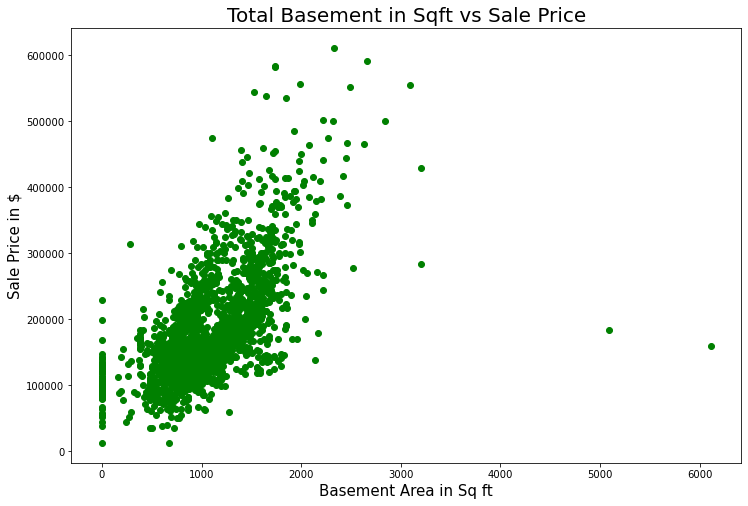

In [93]:
plt.figure(figsize=(12, 8))
plt.scatter(house_train_set['total_bsmt_sf'], house_train_set['saleprice'], color = "green")
plt.title('Total Basement in Sqft vs Sale Price', fontsize=20)
plt.ylabel('Sale Price in $', fontsize = 15)
plt.xlabel('Basement Area in Sq ft', fontsize = 15);

A visible trend is also present here; the price increase when the basement area increase. Most value are between 1000 and 2000 sqft. The most expensive houses have a basement area greater than 2000 sqft which illustrate the trend. The price decrease after 3000 sqft and we also two notable outliers with a basement area greater than 5000 sqft.
Just like the garage area, the basement area is influential on the final price but after a certain point it doesn't male the price higher. In contrary it might result in price decrease.

Now let's look at the first floor area vs the sale price:

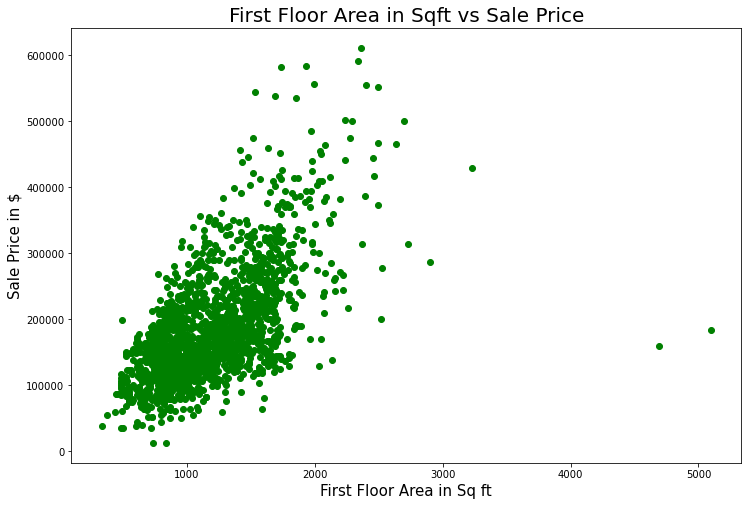

In [94]:
plt.figure(figsize=(12, 8))
plt.scatter(house_train_set['1st_flr_sf'], house_train_set['saleprice'], color = "green")
plt.title('First Floor Area in Sqft vs Sale Price', fontsize=20)
plt.ylabel('Sale Price in $', fontsize = 15)
plt.xlabel('First Floor Area in Sq ft', fontsize = 15);

The trend is visible and very similar to the one observed in the previous scatterplot(basement area vs sale price).
Obviously we have no value at 0 sqft since we are now talking about the living area. As the first floor area increase in space, the price increase as well. Most Values are between 1000 and 2000 sqft with the highest values around 2000 sqft. After this point the price decrease and the houses with a very large 1st floor area (more than 4000 sqft) have a significantly lower price. While the 1st floor  area is an important factor on the final price, the biggest space don't equal to the highest price. 

# Categorical values 

Up until now we only observed the numerical features. While some of them showed a stron correlation with the final prices of the houses, they are many more features present capable of influencing the price.
Does the house have an alley, what about the neighborhood ? What type of house is it ? Does it have a fireplace or a pool ? Several methods can be used to determine the best categorical features to use in our model.
I choose to dummify most of them and look at the correlation between only the categorical features and the sale price.
I will then choose the 4 most correlated features and use them in concurrence with the numerical features to fit our model.

In [95]:
house_train_set.dtypes

id                   int64
pid                  int64
ms_subclass          int64
ms_zoning           object
lot_frontage       float64
lot_area             int64
street              object
alley               object
lot_shape           object
land_contour        object
utilities           object
lot_config          object
land_slope          object
neighborhood        object
condition_1         object
condition_2         object
bldg_type           object
house_style         object
overall_qual         int64
overall_cond         int64
year_built           int64
year_remod/add       int64
roof_style          object
roof_matl           object
exterior_1st        object
exterior_2nd        object
mas_vnr_type        object
mas_vnr_area       float64
exter_qual          object
exter_cond          object
foundation          object
bsmt_height         object
bsmt_cond           object
bsmt_exposure       object
bsmtfin_type_1      object
bsmtfin_sf_1       float64
bsmtfin_type_2      object
b

In [97]:
categorical_features = house_train_set[['ms_zoning', 'street', 'alley', 'lot_shape','land_contour', 'utilities', 'lot_config',\
                        'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type', 'house_style',\
                          'roof_style', 'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'exter_qual',\
                          'exter_cond', 'foundation', 'bsmt_height', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1',\
                          'bsmtfin_type_2', 'heating', 'heating_qc', 'central_air', 'electrical', 'kitchen_qual',\
                          'functional', 'fireplace_qu', 'garage_type', 'garage_finish', 'garage_qual', 'paved_drive',\
                                       'pool_qc', 'fence', 'misc_feature', 'sale_type']]

In [98]:
encoded_values = pd.get_dummies(categorical_features, drop_first=True)

In [101]:
categorical_corr = pd.concat([encoded_values, house_train_set['saleprice']], axis = 1)

In [108]:
pd.set_option("display.max_rows",10, "display.max_columns", None)

In [109]:
categorical_corr.corr(method='pearson')

ms_zoning_C (all)  ms_zoning_FV  ms_zoning_I (all)  \
ms_zoning_C (all)           1.000000     -0.022040          -0.002139   
ms_zoning_FV               -0.022040      1.000000          -0.005034   
ms_zoning_I (all)          -0.002139     -0.005034           1.000000   
ms_zoning_RH               -0.008028     -0.018896          -0.001834   
ms_zoning_RL               -0.182096     -0.428590          -0.041592   
...                              ...           ...                ...   
sale_type_ConLw            -0.004787     -0.011268          -0.001093   
sale_type_New              -0.028171      0.194184          -0.006434   
sale_type_Oth              -0.004281     -0.010076          -0.000978   
sale_type_WD               -0.022683     -0.145097          -0.056840   
saleprice                  -0.126380      0.106749          -0.034553   

                   ms_zoning_RH  ms_zoning_RL  ms_zoning_RM  street_Pave  \
ms_zoning_C (all)     -0.008028     -0.182096     -0.041179    -0.256129   
ms_zoning_FV          -0.018896     -0.428590     -0.096921     0.013338   
ms_zoning_I (all)     -0.001834     -0.041592     -0.009405    -0.377410   
ms_zoning_RH           1.000000     -0.156118     -0.035304     0.004859   
ms_zoning_RL          -0.156118      1.000000     -0.800764     0.069824   
...                         ...           ...           ...          ...   
sale_type_ConLw       -0.004104     -0.021463      0.033871     0.002897   
sale_type_New         -0.024152     -0.003362     -0.098630     0.017049   
sale_type_Oth         -0.003670     -0.003180      0.011870     0.002591   
sale_type_WD           0.014717      0.013124      0.077206     0.001995   
saleprice             -0.034162      0.230202     -0.280768     0.069912   

                   alley_No alley  alley_Pave  lot_shape_IR2  lot_shape_IR3  \
ms_zoning_C (all)       -0.034333    0.046934      -0.016075      -0.006429   
ms_zoning_FV            -0.277865    0.492236       0.017961      -0.015132   
ms_zoning_I (all)        0.005987   -0.003672      -0.003672      -0.001468   
ms_zoning_RH            -0.024491    0.059532       0.096189      -0.005512   
ms_zoning_RL             0.374324   -0.268869       0.029970      -0.000322   
...                           ...         ...            ...            ...   
sale_type_ConLw          0.013401   -0.008218       0.052985      -0.003287   
sale_type_New           -0.000451    0.075442      -0.003341       0.008166   
sale_type_Oth            0.011983   -0.007349      -0.007349      -0.002939   
sale_type_WD             0.037871   -0.069531       0.010946       0.003980   
saleprice                0.135227   -0.014571       0.110016       0.009809   

                   lot_shape_Reg  land_contour_HLS  land_contour_Low  \
ms_zoning_C (all)       0.063308          0.005399          0.021353   
ms_zoning_FV            0.028916         -0.047394         -0.033355   
ms_zoning_I (all)       0.016872         -0.004599         -0.003237   
ms_zoning_RH            0.001896          0.012447         -0.012150   
ms_zoning_RL           -0.246853          0.033782          0.053168   
...                          ...               ...               ...   
sale_type_ConLw        -0.003265         -0.010294         -0.007245   
sale_type_New          -0.060712          0.103622         -0.042632   
sale_type_Oth          -0.012092         -0.009205         -0.006478   
sale_type_WD            0.023869         -0.056788          0.046864   
saleprice              -0.306704          0.212396          0.032955   

                   land_contour_Lvl  utilities_NoSeWa  utilities_NoSewr  \
ms_zoning_C (all)         -0.034907         -0.002139         -0.002139   
ms_zoning_FV               0.076577         -0.005034         -0.005034   
ms_zoning_I (all)          0.007431         -0.000489          1.000000   
ms_zoning_RH              -0.070195         -0.001834         -0.001834   
ms_zoning_RL              -0.026543     

The four categorical column with the highest correlation coeffiecient to the sale price are : foundation, bsmtfin_type, neighborhood, exter_qual, fireplace_qu


1. foundation : 0.530973
2. bsmtfin_type_1 : 0.463972
3. neighborhood : 0.449007
4. exter_qual : 0.447106


I am going to add this features to the numerical values to fit our models. I will first perform a linear regression model with only numerical features and then add those categorical features to see how my initial model imporve.

Let's explore the relationship between foundation and sale price:

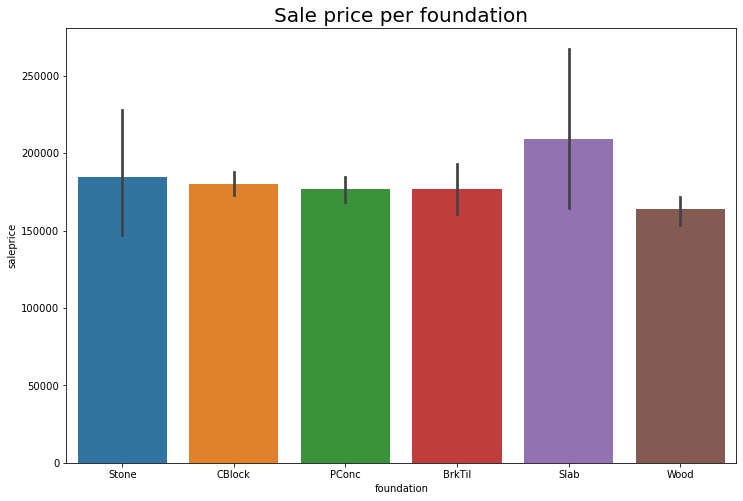

In [112]:
plt.figure(figsize=(12, 8))
sns.barplot(data=house_train_set, x=house_test_data['foundation'], y=house_train_set['saleprice'])
plt.title('Sale price per foundation', fontsize=20);

Here we can see that most foundation average at about the same price. The wood foundation are cheaper in general and the foundation that yield that highest sale price is the slab foundation